# Estadificación de Alzheimer por medio de imágenes MRI utilizando redes neuronales

Dataset provisto por el sitio web de Kaggle: https://www.kaggle.com/tourist55/Alzheimers-dataset-4-class-of-images




In [1]:
!pip install progress

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9632 sha256=3cd7f756b7d9de021cf19bb6f14691889e3e1876e8e8cbd9b9b0767a00b9223d
  Stored in directory: /root/.cache/pip/wheels/8e/d7/61/498d8e27dc11e9805b01eb3539e2ee344436fc226daeb5fe87
Successfully built progress


Accedemos a nuestro drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Programa de investigación en IB/Imágenes/Alzheimer_s Dataset')

In [4]:
!ls

checkpoint  loss_plot.png  TensorFlow.ipynb  test  train  Untitled0.ipynb


In [5]:
!ls test

MildDemented  ModerateDemented	NonDemented  VeryMildDemented


In [6]:
!ls train

MildDemented  ModerateDemented	NonDemented  VeryMildDemented


# Importamos librerías necesarias

In [7]:
import glob
import pandas as pd
import numpy as np
from PIL import Image

In [8]:
# Generales
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random

# Data
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset

# Model
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
# from pytorchtools import EarlyStopping

# Métricas y visualización
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

In [9]:
from sklearn.utils import shuffle

In [10]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms

# Data

In [11]:
# second approach
FOLDER_PATH = 'train/'
categories = sorted(os.listdir(FOLDER_PATH))
num_classes = 4

MILD_INDEX = categories.index("MildDemented")
MODERATE_INDEX = categories.index("ModerateDemented")
NON_INDEX = categories.index("NonDemented")
VERYMILD_INDEX = categories.index("VeryMildDemented")

# Almacenar las rutas a las imagenes agrupados por categorias en memoria
images_path = [list() for category in categories]

for index, category in enumerate(categories):
    category_path = os.path.join(FOLDER_PATH, category)

    # Recorrer imágenes
    images = [i for i in os.listdir(category_path)]
    for image_name in images:
        image_path = os.path.join(category_path, image_name)
        images_path[index].append(image_path)

print("Sobre el dataset")
for category_name, images in zip(categories, images_path):
    print("#Imagenes de la clase {}: {}".format(category_name, len(images)))

Sobre el dataset
#Imagenes de la clase MildDemented: 717
#Imagenes de la clase ModerateDemented: 52
#Imagenes de la clase NonDemented: 2560
#Imagenes de la clase VeryMildDemented: 1792


In [12]:
train_data = list()

for class_index, images_per_class in enumerate(images_path):
  train_data.extend([(img, class_index) for img in images_per_class])

In [13]:
FOLDER_PATH_TEST = 'test/'
categories_test = sorted(os.listdir(FOLDER_PATH_TEST))
num_classes = 4

MILD_INDEX_TEST = categories_test.index("MildDemented")
MODERATE_INDEX_TEST = categories_test.index("ModerateDemented")
NON_INDEX_TEST = categories_test.index("NonDemented")
VERYMILD_INDEX_TEST = categories_test.index("VeryMildDemented")

# Almacenar las rutas a las imagenes agrupados por categorias en memoria
images_path_test = [list() for category in categories_test]

for index, category in enumerate(categories_test):
    category_path_test = os.path.join(FOLDER_PATH_TEST, category)

    # Recorrer imágenes
    images_test = [i for i in os.listdir(category_path_test)]
    for image_name in images_test:
        image_path_test = os.path.join(category_path_test, image_name)
        images_path_test[index].append(image_path_test)

print("Sobre el dataset")
for category_name, images in zip(categories_test, images_path_test):
    print("#Imagenes de la clase {}: {}".format(category_name, len(images)))

Sobre el dataset
#Imagenes de la clase MildDemented: 179
#Imagenes de la clase ModerateDemented: 12
#Imagenes de la clase NonDemented: 640
#Imagenes de la clase VeryMildDemented: 448


In [14]:
test_data = list()

for class_index, images_per_class in enumerate(images_path_test):
  test_data.extend([(img, class_index) for img in images_per_class])

# Visualización

In [15]:
def take_images(data,x):
  """ Agarra las primeras 5 imágenes del conjunto data que ve 
  : params: data: arreglo de tuplas del cual queremos extraer información
  : params: x: el label o la clase de imágenes que queremos coleccionar 
  """

  path_img = []
  count = 0
  for el in shuffle(data):
    if el[1] == x:
      path_img.append(el[0])
      count = count + 1
      if count > 4:
        return path_img

In [16]:
classes = ['Mild Demented','Moderate Demented','Non Demented','Very Mild Demented']

In [17]:
mild_sample = take_images(train_data,0)
moderate_sample =  take_images(train_data,1)
non_sample = take_images(train_data,2)
verymild_sample = take_images(train_data,3)

In [18]:
mild_tests = take_images(test_data,0)
moderate_tests =  take_images(test_data,1)
non_tests = take_images(test_data,2)
verymild_tests = take_images(test_data,3)

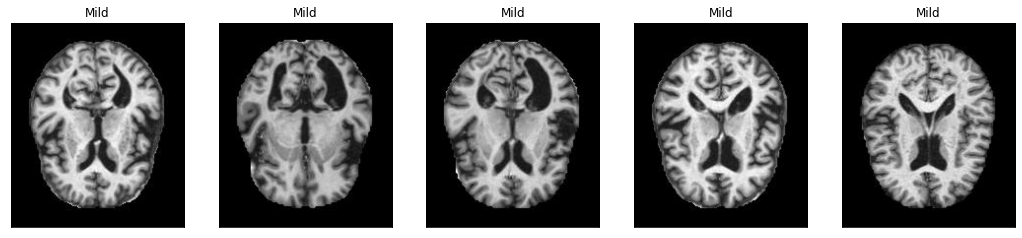

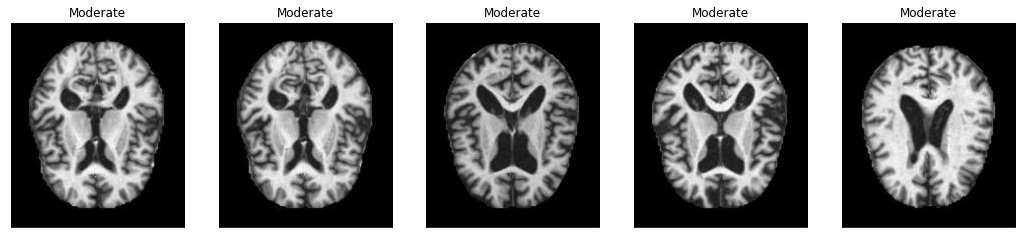

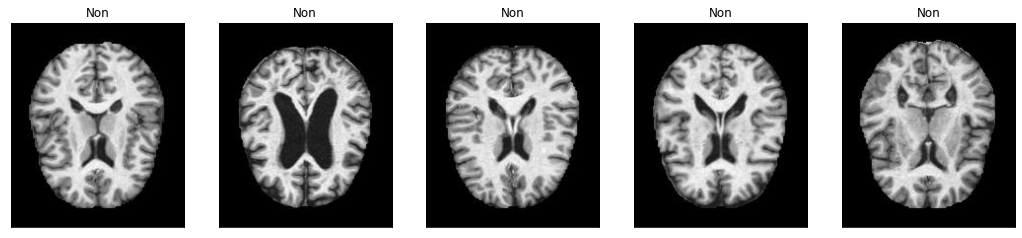

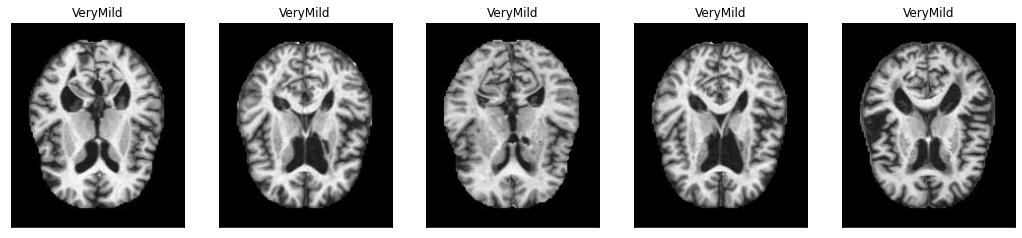

In [19]:
def visualize_sample(image_list, title):
    plt.figure(figsize=(18,8))
    for i in range(len(image_list)):
      plt.subplot(1,len(image_list),i+1), plt.imshow(cv2.imread(image_list[i]))
      plt.xticks([]), plt.yticks([])
      plt.title(title)

    plt.show()


visualize_sample(mild_sample, "Mild")
visualize_sample(moderate_sample, "Moderate")
visualize_sample(non_sample, "Non")
visualize_sample(verymild_sample, "VeryMild")

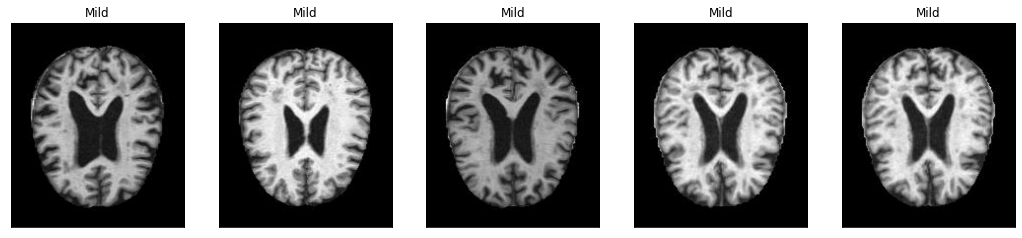

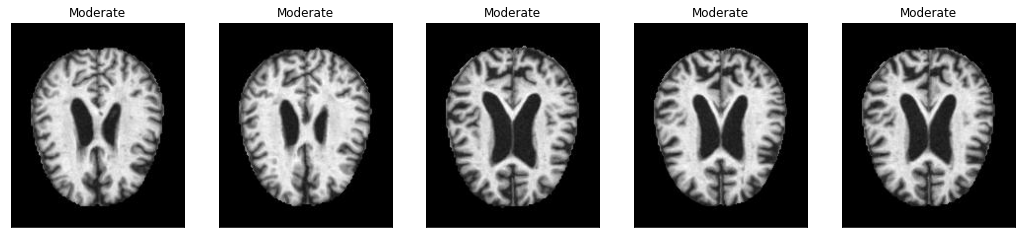

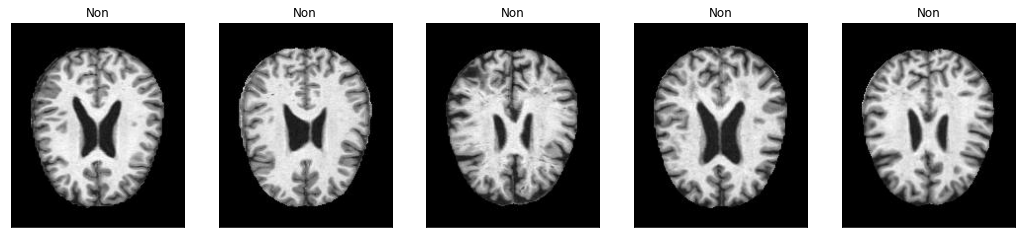

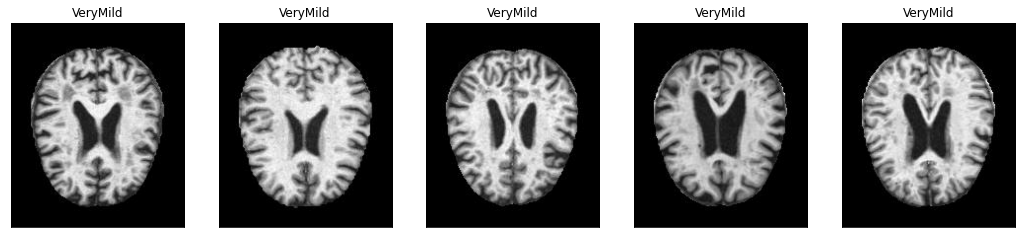

In [20]:
visualize_sample(mild_tests, "Mild")
visualize_sample(moderate_tests, "Moderate")
visualize_sample(non_tests, "Non")
visualize_sample(verymild_tests, "VeryMild")

Las imágenes parecen estar recortadas. No son uniformes en sus niveles de grises, algunas aparecen más oscuras en toda la imagen, será producto de la enfermedad?

Una posible mejora podría ser mejorar el contraste de las imágenes. Hay que rescatar que las imágenes se encuentran en un formato demasiado comprimido (jpg)

In [21]:
input_size = (224,224)

In [22]:
def procesar_img(path):
  img = cv2.imread(path)
  img = cv2.resize(img, input_size)    

  # Ecualización adaptada
  lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

  clahe = cv2.createCLAHE(clipLimit=6.0,tileGridSize=(5,5))
  lab[...,0] = clahe.apply(lab[...,0])

  bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
  bgr = bgr/255.

  return bgr


In [23]:
img_mild = [procesar_img(path) for path in mild_sample]
img_moderate = [procesar_img(path) for path in moderate_sample]
img_non = [procesar_img(path) for path in non_sample]
img_verymild = [procesar_img(path) for path in verymild_sample]

In [24]:
img_mildt = [procesar_img(path) for path in mild_tests]
img_moderatet = [procesar_img(path) for path in moderate_tests]
img_nont = [procesar_img(path) for path in non_tests]
img_verymildt = [procesar_img(path) for path in verymild_tests]

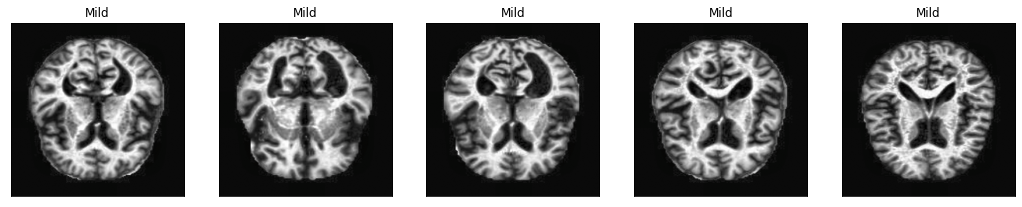

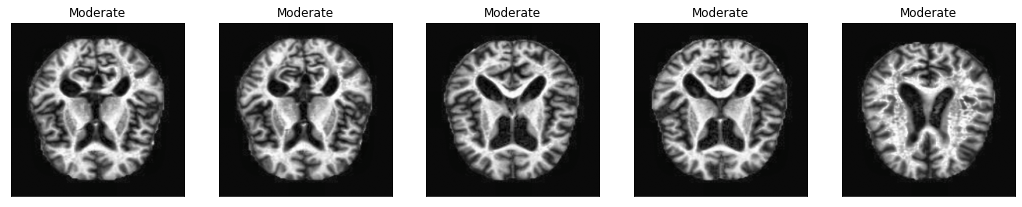

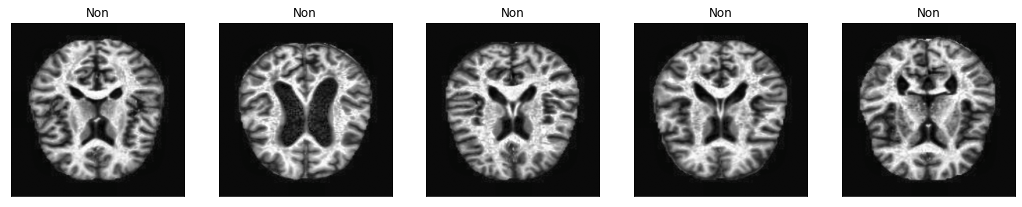

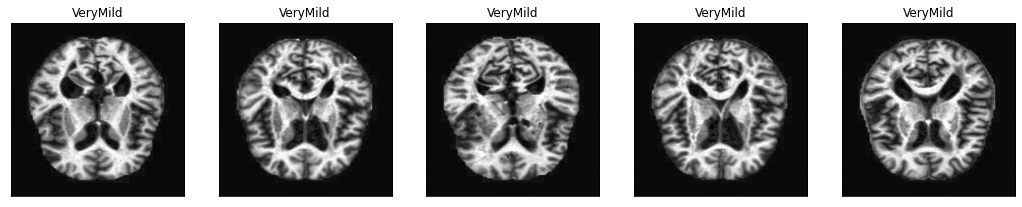

In [25]:
def visualize_sample_t(image_list, title):
    plt.figure(figsize=(18,8))
    for i in range(len(image_list)):
      plt.subplot(1,len(image_list),i+1), plt.imshow(image_list[i])
      plt.xticks([]), plt.yticks([])
      plt.title(title)

    plt.show()


visualize_sample_t(img_mild, "Mild")
visualize_sample_t(img_moderate, "Moderate")
visualize_sample_t(img_non, "Non")
visualize_sample_t(img_verymild, "VeryMild")

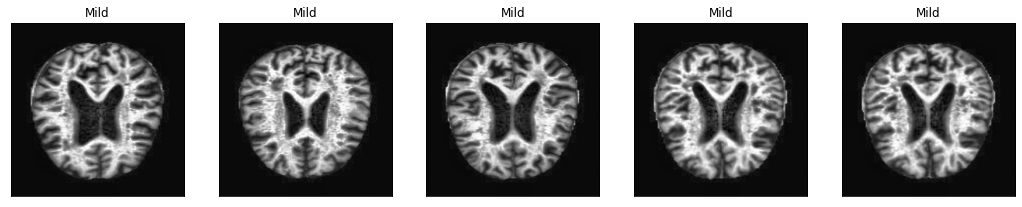

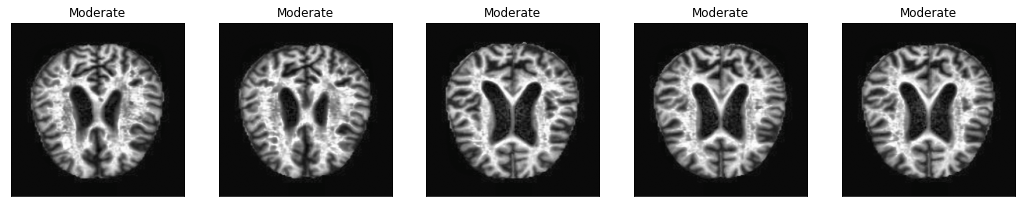

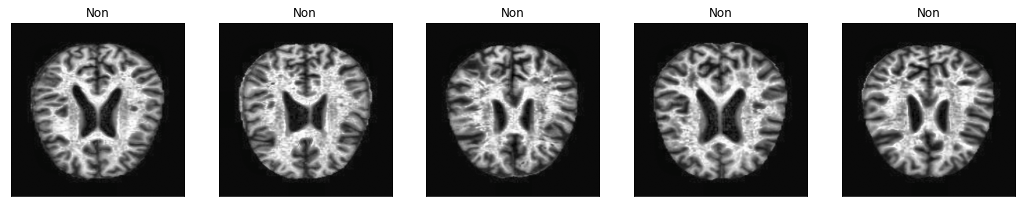

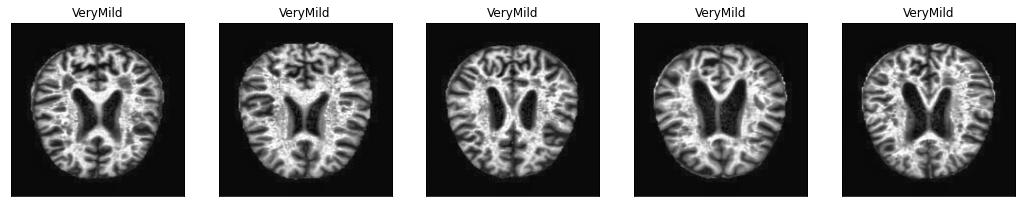

In [26]:
visualize_sample_t(img_mildt, "Mild")
visualize_sample_t(img_moderatet, "Moderate")
visualize_sample_t(img_nont, "Non")
visualize_sample_t(img_verymildt, "VeryMild")

Ahora las imágenes parecen estar más uniformizadas en sus niveles de grises. Vamos a plantear como pre procesado de las imágenes, antes de que entren al modelo, que primero se cambie el tamaño, se ecualice, y luego se normalicen los niveles de grises

# Config

In [27]:
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# Dataset

In [28]:
from torch.utils.data import Dataset

class MRIDataset(Dataset):
  """
  Procesa todas las imágenes de interés para el entrenamiento y los devuelve de a batches con un dataloader

  """

  def __init__(self, raw_data, input_size=(224,224)):
        self.raw_data = raw_data
        self.input_size = input_size


  def __len__(self):
      return len(self.raw_data)

  def __getitem__(self, idx):
      label = self.raw_data[idx][1]
      target_tensor = torch.tensor(label).type(torch.LongTensor)

      #print(label)
      img_path = self.raw_data[idx][0]
      image = cv2.imread(img_path)
      image = cv2.resize(image, self.input_size)

      # Ecualización adaptada
      lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

      clahe = cv2.createCLAHE(clipLimit=6.0,tileGridSize=(5,5))
      lab[...,0] = clahe.apply(lab[...,0])

      bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
      bgr = bgr/255.


      image = bgr
      #print(image.shape)

      input_tensor = torch.from_numpy(image).reshape(3,self.input_size[0], self.input_size[1]).float()
      # print(input_tensor.dtype)

      return input_tensor, target_tensor

# Red Neuronal

In [ ]:
model = models.resnet50(pretrained=True)
backbone_out = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(backbone_out,256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256,4),
    nn.LogSoftmax(dim=1)
)

# Hiperparámetros

In [50]:
# Hyperparameters
# lr = 0.0001              # Learning rate
lr = 0.0005
input_size = (224,224)

# Select the device to use
if torch.cuda.is_available(): device = torch.device('cuda')
else: device = torch.device('cpu')

# Send the model to the device
model = model.to(device)

# Create dataloader
from torch.utils.data import DataLoader

batch_size = 50

In [51]:
from torchsummary import summary

summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [52]:
dataset = MRIDataset(train_data)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Pesos

In [53]:
import torch.optim as optim


# Create an optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

n_samples = len(train_data)
n_classes = len(categories)

w1 = (n_samples/(n_classes*717)) - 0.5
w2 =(( n_samples/(n_classes*52)) * 0.10 ) - 0.5
w3 = n_samples/(n_classes*2560) 
w4 = n_samples/(n_classes*1792) 

weight = torch.tensor([w1,w2,w3,w4])

weight = weight.to(device)

# Loss Function
criterion = nn.NLLLoss(weight= weight)

# Entrenamiento

In [54]:
import sys
from progress.bar import Bar

def train_model(new_model, train_data, criterion, optimizer, num_epochs=25):
    new_model.train()
    Bar.check_tty = False
    Bar.file = sys.stdout

    for epoch in range(num_epochs):

        total_loss = 0.0
        processed = 0
        bar = Bar('Training Model', max=len(dataloader))
        for index, (X,y) in enumerate(dataloader):
            input_tensor = X
            gt_tensor = y

            input_tensor = input_tensor.to(device)
            gt_tensor = gt_tensor.to(device)

            optimizer.zero_grad()
            output = new_model(input_tensor)
            loss = criterion(output, gt_tensor)
            total_loss += loss.item()

            loss.backward()
            optimizer.step()
            processed += input_tensor.shape[0]
            Bar.suffix = 'Train: [{0}][{1}/{2}]|Tot: {total:} |ETA: {eta:} '.format(epoch+1, processed, len(train_data),total=bar.elapsed_td, eta=bar.eta_td)
            Bar.suffix = Bar.suffix + '| Loss {:.4f} '.format(total_loss / (index + 1))
            bar.next()
        bar.finish()
    return new_model

In [55]:
model = train_model(model, train_data, criterion, optimizer, num_epochs = 5)

Training Model |################################| Train: [1][5121/5121]|Tot: 0:01:10 |ETA: 0:00:01 | Loss 1.0514 
Training Model |################################| Train: [2][5121/5121]|Tot: 0:01:10 |ETA: 0:00:01 | Loss 0.7575 
Training Model |################################| Train: [3][5121/5121]|Tot: 0:01:10 |ETA: 0:00:01 | Loss 0.4565 
Training Model |################################| Train: [4][5121/5121]|Tot: 0:01:10 |ETA: 0:00:01 | Loss 0.2775 
Training Model |################################| Train: [5][5121/5121]|Tot: 0:01:10 |ETA: 0:00:01 | Loss 0.1700 


# Procesamos datos nuevos

In [56]:
def preprocess(path_to_image, label):
    img = cv2.imread(path_to_image)
    img = cv2.resize(img, input_size)  

    # Ecualización adaptada
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    clahe = cv2.createCLAHE(clipLimit=6.0,tileGridSize=(5,5))
    lab[...,0] = clahe.apply(lab[...,0])

    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    bgr = bgr/255.
    img = bgr

    input_tensor = torch.from_numpy(img).reshape(1, 3, input_size[0],input_size[1]).float()
    gt_tensor = torch.tensor([label]).type(torch.LongTensor)
    return input_tensor, gt_tensor

In [57]:
def test_model(new_model, test_data):

    y_true = []
    y_pred = []
    new_model = new_model.eval()
    Bar.check_tty = False
    Bar.file = sys.stdout
    bar = Bar('Testing Model', max=len(test_data))

    stats = [0 for _ in categories]
    total_items = [0 for _ in categories]
    for index, input_data in enumerate(test_data):
        img_path, target_class = input_data

        input_tensor, _ = preprocess(img_path, target_class)
        input_tensor = input_tensor.to(device)
        _ = _.to(device)
        output = new_model(input_tensor)
        loss = criterion(output, _)

        prediction = torch.argmax(output).item()
        
        y_pred.append(prediction)
        y_true.append(target_class)


        if target_class == prediction:
            stats[target_class] += 1
        total_items[target_class] += 1
        Bar.suffix = 'Test: [{0}/{1}]|Tot: {total:} |ETA: {eta:} '.format(index, len(test_data),total=bar.elapsed_td, eta=bar.eta_td)
        bar.next()
    
    bar.finish()
    for category_name, stat, tot in zip(categories, stats, total_items):
        acc = stat * 1.0 / tot
        print("Accuracy for class {}: {:.4f}".format(category_name, acc))

    print("\nReporte de clasificación: \n", classification_report(y_true, y_pred, target_names = categories))
    print("\nMatriz de confusión: \n")

    conf_arr = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

    ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels = categories, yticklabels = categories)

    plt.title('Alzheimer\'s Disease Diagnosis')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show(ax)

Testing Model |################################| Test: [1278/1279]|Tot: 0:00:23 |ETA: 0:00:01 
Accuracy for class MildDemented: 0.2849
Accuracy for class ModerateDemented: 0.5000
Accuracy for class NonDemented: 0.8922
Accuracy for class VeryMildDemented: 0.3393

Reporte de clasificación: 
                   precision    recall  f1-score   support

    MildDemented       0.72      0.28      0.41       179
ModerateDemented       0.55      0.50      0.52        12
     NonDemented       0.61      0.89      0.72       640
VeryMildDemented       0.59      0.34      0.43       448

        accuracy                           0.61      1279
       macro avg       0.62      0.50      0.52      1279
    weighted avg       0.62      0.61      0.57      1279


Matriz de confusión: 



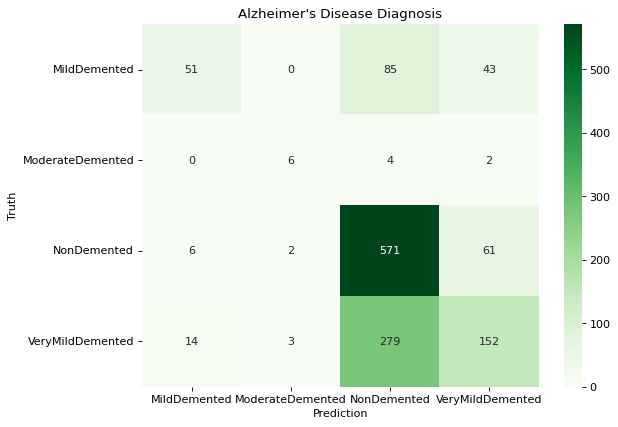

In [58]:
test_model(model, test_data)

https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html

https://www.it-swarm-es.com/es/python/como-eliminar-la-ultima-capa-fc-de-un-modelo-resnet-en-pytorch/807243870/

https://www.it-swarm-es.com/es/python/como-inicializar-pesos-en-pytorch/837221724/


In [ ]:
def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath = best_model_path
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(f_path, best_fpath)

In [ ]:
checkpoint = {
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
              }

In [ ]:
# Guardé el modelo
save_ckp(checkpoint, False, './checkpoint/current_checkpoint.pt', './best_model/best_model.pt')

# Ahora con curvas ROC, AUC y Sylince map

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import itertools
from scipy import interp
import pandas as pd

#Colors
BLUE   = '#5DADE2'
RED    = '#ff7043'
ORANGE = '#F5B041'
GREEN  = '#58D68D'
YELLOW = '#F4D03F'

In [ ]:
def test_model_curves(new_model, test_data):
    lw = 2
    y_true = []
    y_pred = []
    new_model = new_model.eval()
    Bar.check_tty = False
    Bar.file = sys.stdout
    bar = Bar('Testing Model', max=len(test_data))

    stats = [0 for _ in categories]
    total_items = [0 for _ in categories]
    for index, input_data in enumerate(test_data):
        img_path, target_class = input_data

        input_tensor, _ = preprocess(img_path, target_class)
        input_tensor = input_tensor.to(device)
        _ = _.to(device)
        output = new_model(input_tensor)
        loss = criterion(output, _)

        prediction = torch.argmax(output).item()
        
        y_pred.append(prediction)
        y_true.append(target_class)


        if target_class == prediction:
            stats[target_class] += 1
        total_items[target_class] += 1
        Bar.suffix = 'Test: [{0}/{1}]|Tot: {total:} |ETA: {eta:} '.format(index, len(test_data),total=bar.elapsed_td, eta=bar.eta_td)
        bar.next()
    
    bar.finish()
    for category_name, stat, tot in zip(categories, stats, total_items):
        acc = stat * 1.0 / tot
        print("Accuracy for class {}: {:.4f}".format(category_name, acc))

    report = classification_report(y_true, y_pred, target_names = categories )
    
    print("\nReporte de clasificación: \n", report )

    print("\nMatriz de confusión: \n")

    conf_arr = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

    ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels = categories, yticklabels = categories)

    plt.title('Alzheimer\'s Disease Diagnosis')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show(ax)
    
    y1 = label_binarize(y_true, classes=[0, 1, 2, 3])
    y2 = label_binarize(y_pred, classes=[0, 1, 2, 3])
    n_classes = y1.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()  
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y1[:, i], y2[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y1.ravel(), y2.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    print("\n")
    plt.figure(figsize = (10,8))
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

    colors = itertools.cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()  


In [ ]:
test_model_curves(model, test_data)


Las curvas ROC suelen presentar una tasa de verdaderos positivos en el eje Y y una tasa de falsos positivos en el eje X. Esto significa que la esquina superior izquierda de la gráfica es el punto "ideal": una tasa de falsos positivos de cero y una tasa de verdaderos positivos de uno. Esto no es muy realista, pero significa que un área más grande bajo la curva (AUC) suele ser mejor.

La "inclinación" de las curvas ROC también es importante, ya que es ideal para maximizar la tasa de verdaderos positivos y minimizar la tasa de falsos positivos.

Las curvas ROC se utilizan normalmente en la clasificación binaria para estudiar la salida de un clasificador. Para extender la curva ROC y el área ROC a la clasificación de etiquetas múltiples, es necesario binarizar la salida. Se puede dibujar una curva ROC por etiqueta, pero también se puede dibujar una curva ROC considerando cada elemento de la matriz del indicador de etiqueta como una predicción binaria (micro-average).

Otra medida de evaluación para la clasificación de etiquetas múltiples es el macro-average, que otorga el mismo peso a la clasificación de cada etiqueta.

# Aumentación de datos

https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/ 

https://medium.com/analytics-vidhya/image-data-augmentation-to-balance-dataset-in-classification-tasks-5e25bbd9a228